# EDA - Education resource predictor

In [1]:
import urllib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("../raw_data/all_expanded_ML.csv")

## Memory Optimization

In [3]:
def compress(df, **kwargs):
    """
    Reduces the size of the DataFrame by downcasting numerical columns
    """
    input_size = df.memory_usage(index=True).sum()/ 1024**2
    print("old dataframe size: ", round(input_size,2), 'MB')
    
    in_size = df.memory_usage(index=True).sum()

    for t in ["float", "integer"]:
        l_cols = list(df.select_dtypes(include=t))

        for col in l_cols:
            df[col] = pd.to_numeric(df[col], downcast=t)

    out_size = df.memory_usage(index=True).sum()
    ratio = (1 - round(out_size / in_size, 2)) * 100
    
    print("optimized size by {} %".format(round(ratio,2)))
    print("new DataFrame size: ", round(out_size / 1024**2,2), " MB")

    return df

In [4]:
df = compress(df, verbose=True)
df.head(1)

old dataframe size:  10.44 MB
optimized size by 39.0 %
new DataFrame size:  6.4  MB


,Ano,Código_IBGE,Localização,Aprovação,Reprovação,Abandono,Matrículas,Docentes,Estabelecimentos,Turmas,...,Poverty_%,Unemployed_%,Código_UF,Estado,UF,Município,Região,Acesso_a_internet_%,Adjusted_population,Adjusted_funding
0,2012,1100023,Rural,92.599998,4.0,3.4,498,42,1,15,...,31.610001,6.35,11,Rondônia,RO,Ariquemes,Norte,21,13912.05,5327668.086


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62172 entries, 0 to 62171
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Ano                  62172 non-null  int16  
 1   Código_IBGE          62172 non-null  int32  
 2   Localização          62172 non-null  object 
 3   Aprovação            62172 non-null  float32
 4   Reprovação           62172 non-null  float32
 5   Abandono             62172 non-null  float32
 6   Matrículas           62172 non-null  int32  
 7   Docentes             62172 non-null  int32  
 8   Estabelecimentos     62172 non-null  int16  
 9   Turmas               62172 non-null  int16  
 10  Magreza_total_%      62172 non-null  float32
 11  PIB                  62172 non-null  float64
 12  Poverty_%            62172 non-null  float32
 13  Unemployed_%         62172 non-null  float32
 14  Código_UF            62172 non-null  int8   
 15  Estado               62172 non-null 

In [6]:
df.Código_UF = df.Código_UF.astype("int16")
df["Acesso_a_internet_%"] = df["Acesso_a_internet_%"].astype("int16")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62172 entries, 0 to 62171
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Ano                  62172 non-null  int16  
 1   Código_IBGE          62172 non-null  int32  
 2   Localização          62172 non-null  object 
 3   Aprovação            62172 non-null  float32
 4   Reprovação           62172 non-null  float32
 5   Abandono             62172 non-null  float32
 6   Matrículas           62172 non-null  int32  
 7   Docentes             62172 non-null  int32  
 8   Estabelecimentos     62172 non-null  int16  
 9   Turmas               62172 non-null  int16  
 10  Magreza_total_%      62172 non-null  float32
 11  PIB                  62172 non-null  float64
 12  Poverty_%            62172 non-null  float32
 13  Unemployed_%         62172 non-null  float32
 14  Código_UF            62172 non-null  int16  
 15  Estado               62172 non-null 

In [8]:
columns_to_convert = ['Localização', 'UF', 'Município', 'Região']
for col in columns_to_convert:
    df[col] = df[col].astype('category')


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62172 entries, 0 to 62171
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Ano                  62172 non-null  int16   
 1   Código_IBGE          62172 non-null  int32   
 2   Localização          62172 non-null  category
 3   Aprovação            62172 non-null  float32 
 4   Reprovação           62172 non-null  float32 
 5   Abandono             62172 non-null  float32 
 6   Matrículas           62172 non-null  int32   
 7   Docentes             62172 non-null  int32   
 8   Estabelecimentos     62172 non-null  int16   
 9   Turmas               62172 non-null  int16   
 10  Magreza_total_%      62172 non-null  float32 
 11  PIB                  62172 non-null  float64 
 12  Poverty_%            62172 non-null  float32 
 13  Unemployed_%         62172 non-null  float32 
 14  Código_UF            62172 non-null  int16   
 15  Estado             

## Clean Data

In [10]:
df.describe()

,Ano,Código_IBGE,Aprovação,Reprovação,Abandono,Matrículas,Docentes,Estabelecimentos,Turmas,Magreza_total_%,PIB,Poverty_%,Unemployed_%,Código_UF,Acesso_a_internet_%,Adjusted_population,Adjusted_funding
count,62172.000000,6.217200e+04,62172.000000,62172.000000,62172.000000,62172.000000,62172.000000,62172.000000,62172.000000,62172.000000,62172.000000,62172.000000,62172.000000,62172.000000,62172.000000,6.217200e+04,6.217200e+04
mean,2016.018658,3.166202e+06,84.262245,8.477551,7.260202,996.959339,76.345155,2.906115,31.044345,3.750925,26778.143641,27.971497,9.924197,31.510921,55.707215,2.679314e+04,1.064420e+07
std,2.580877,1.018599e+06,10.435561,7.314059,6.689737,5998.539678,1058.160622,11.200469,149.817023,2.893270,11251.731789,14.644274,3.507049,10.164249,16.267792,1.654634e+05,5.064723e+07
min,2012.000000,1.100015e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9009.127144,7.980000,2.875000,11.000000,21.000000,2.026500e+02,0.000000e+00
25%,2014.000000,2.406809e+06,77.699997,2.900000,2.100000,154.000000,15.000000,1.000000,6.000000,2.380000,16919.841890,14.540000,7.250000,24.000000,44.000000,3.717050e+03,1.601524e+06
50%,2016.000000,3.131802e+06,85.300003,7.000000,5.900000,316.000000,23.000000,1.000000,12.000000,3.570000,25021.801740,21.000000,9.350000,31.000000,56.000000,8.104750e+03,3.710356e+06
75%,2018.000000,4.110003e+06,92.199997,12.300000,10.600000,696.000000,46.000000,2.000000,24.000000,4.810000,36219.335320,42.970001,12.350000,41.000000,69.000000,1.848750e+04,9.339107e+06
max,2020.000000,5.300108e+06,100.000000,100.000000,100.000000,430352.000000,179976.000000,694.000000,12010.000000,100.000000,90742.750390,55.919998,20.174999,53.000000,86.000000,1.047645e+07,3.970060e+09


In [11]:
df.shape

(62172, 22)

In [12]:
df = df.drop_duplicates()

In [13]:
df = df.dropna(how='any', axis=0)

In [14]:
df.shape

(62157, 22)

In [15]:
## Domain specific clearning?? Think!!

## Data Visualization 

### Analysis of Aprovação, Reprovação and Abandono

#### General Overview - Distribution

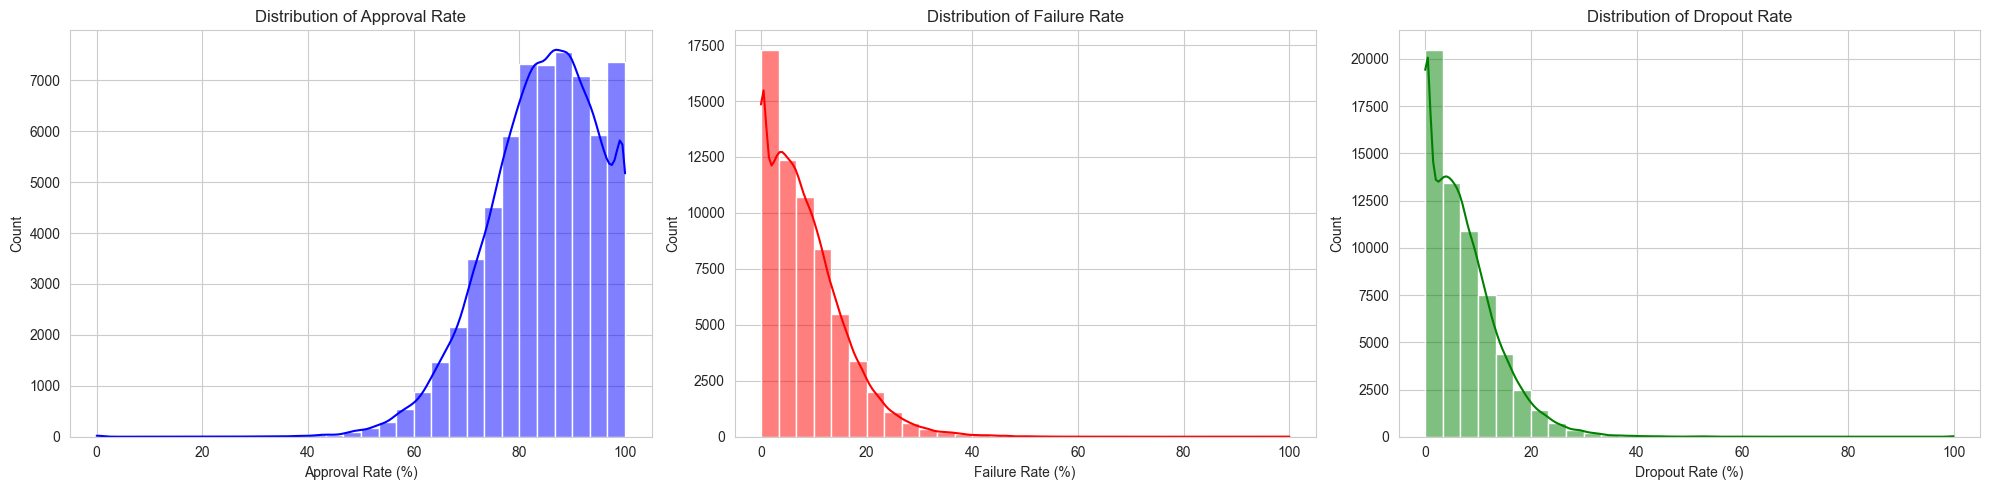

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set_style("whitegrid")

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

# Plot the distribution of Approval rate
sns.histplot(df['Aprovação'], bins=30, kde=True, ax=axes[0], color='blue')
axes[0].set_title('Distribution of Approval Rate')
axes[0].set_xlabel('Approval Rate (%)')

# Plot the distribution of Failure rate
sns.histplot(df['Reprovação'], bins=30, kde=True, ax=axes[1], color='red')
axes[1].set_title('Distribution of Failure Rate')
axes[1].set_xlabel('Failure Rate (%)')

# Plot the distribution of Dropout rate
sns.histplot(df['Abandono'], bins=30, kde=True, ax=axes[2], color='green')
axes[2].set_title('Distribution of Dropout Rate')
axes[2].set_xlabel('Dropout Rate (%)')

plt.tight_layout()
plt.show()


#### General overview - outliers

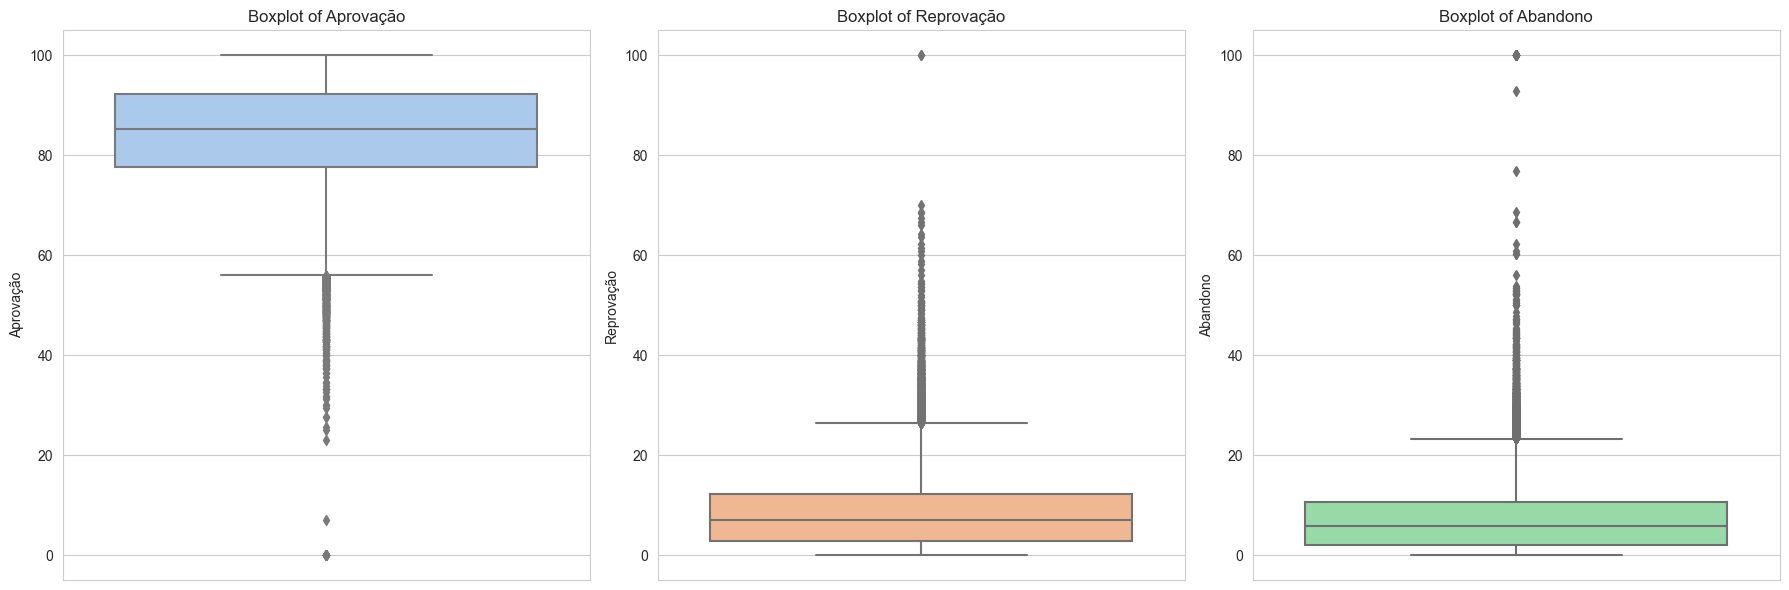

In [17]:
# Features for box plotting
boxplot_features = ['Aprovação', 'Reprovação', 'Abandono']

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Plotting box plots for each feature
for idx, feature in enumerate(boxplot_features):
    sns.boxplot(y=df[feature], ax=axes[idx], color=sns.color_palette("pastel")[idx])
    axes[idx].set_title(f'Boxplot of {feature}')
    axes[idx].set_ylabel(feature)

plt.tight_layout()
plt.show()

#### Trend Analysis

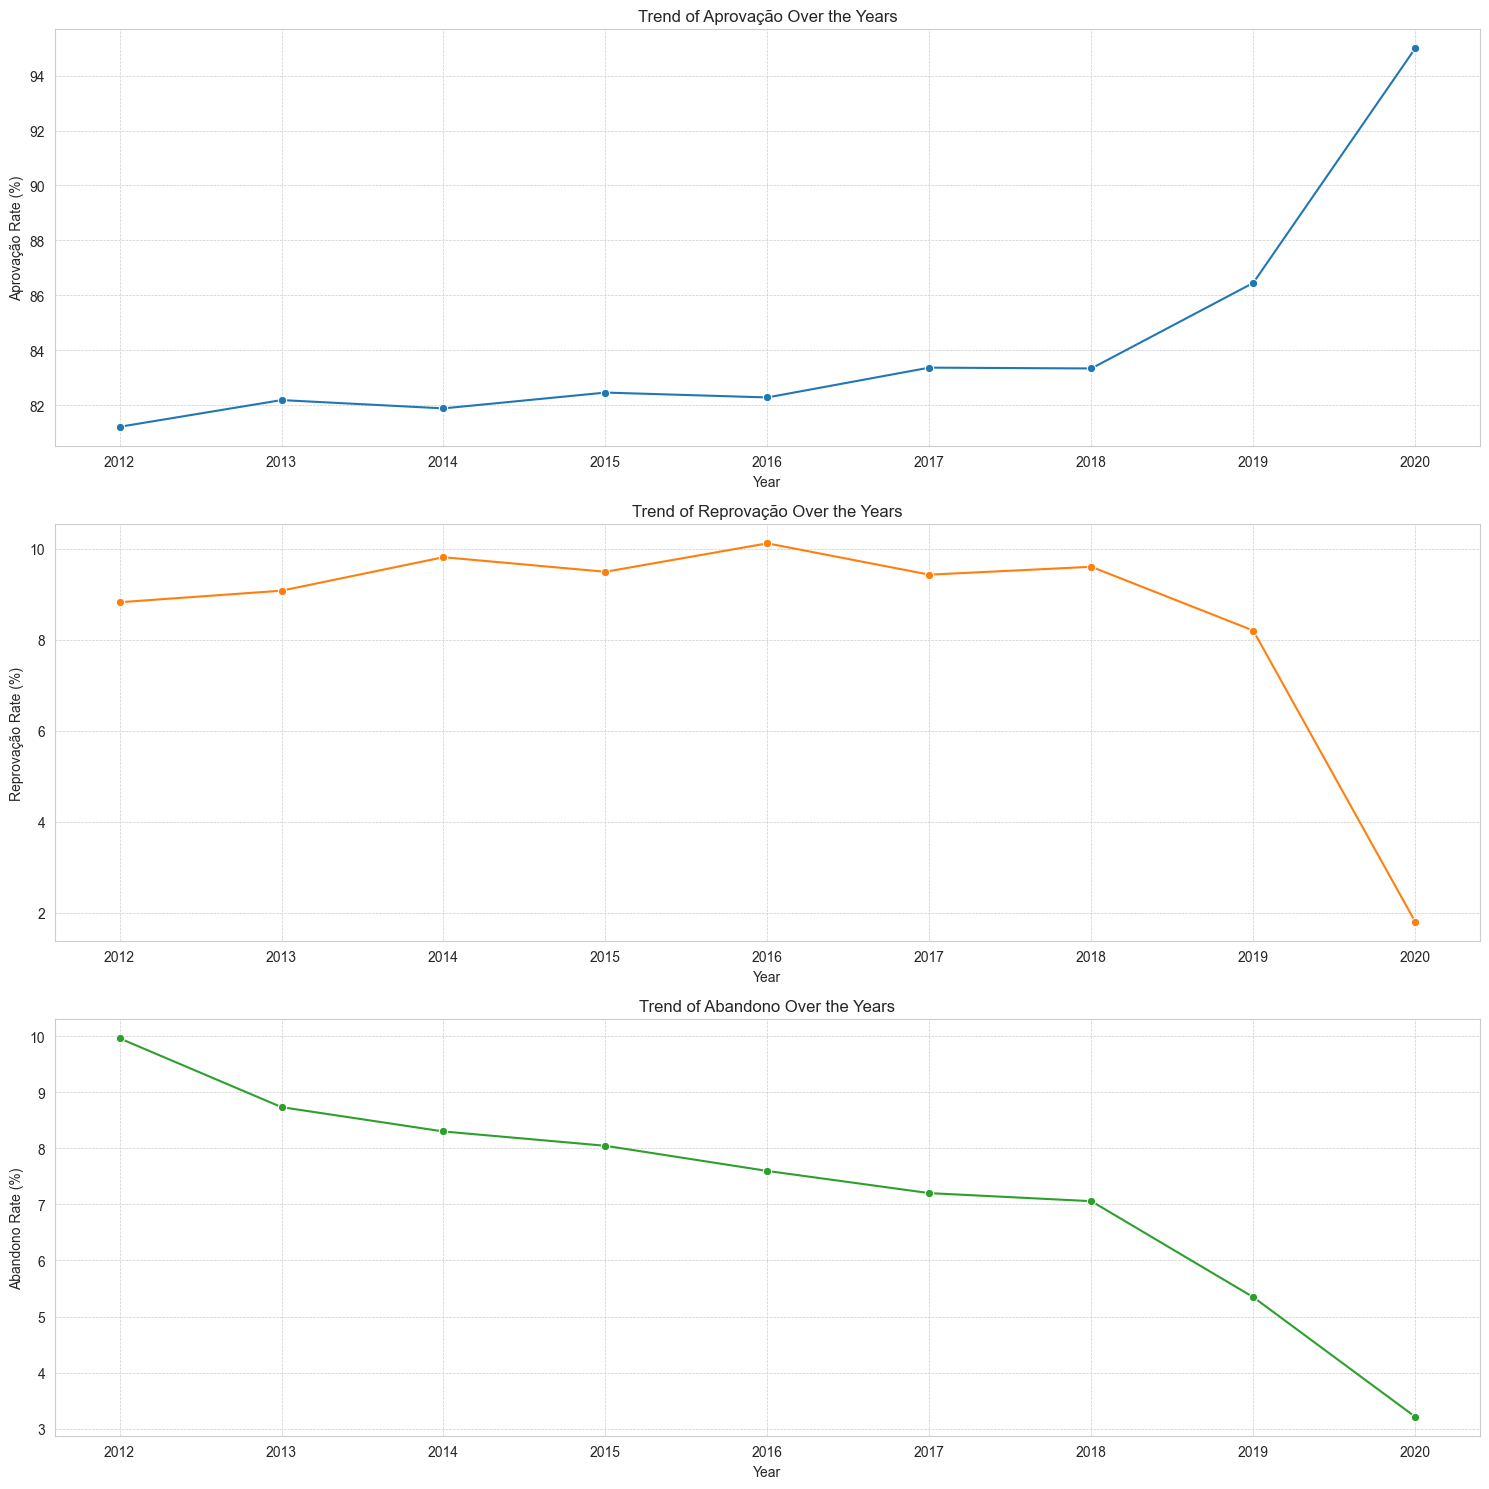

In [18]:
# Features for trend analysis
trend_features = ['Aprovação', 'Reprovação', 'Abandono']

# Group by year and calculate the mean for each feature
yearly_means = df.groupby('Ano')[trend_features].mean()

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 15))

# Plotting trends for each feature
for idx, feature in enumerate(trend_features):
    ax = axes[idx]
    sns.lineplot(x=yearly_means.index, y=yearly_means[feature], ax=ax, marker='o', color=sns.color_palette("tab10")[idx])
    ax.set_title(f'Trend of {feature} Over the Years')
    ax.set_xlabel('Year')
    ax.set_ylabel(f'{feature} Rate (%)')
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

#### Comparison Analysis using Localização

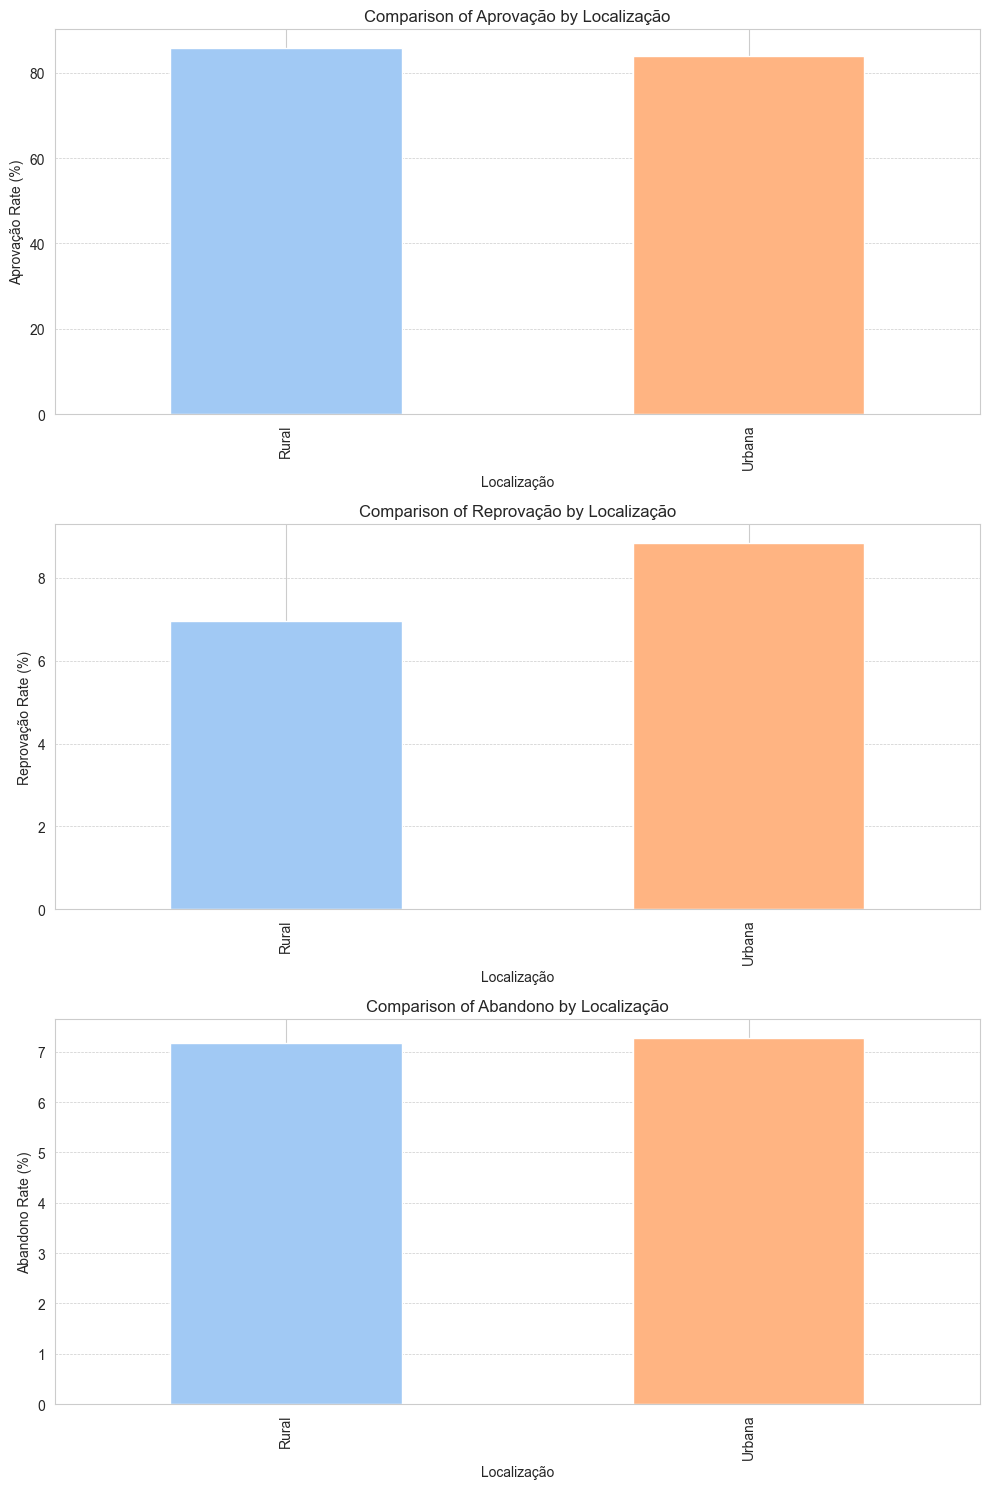

In [19]:
# Group by 'Localização' and calculate the mean for each feature
location_means = df.groupby('Localização')[trend_features].mean()

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

# Plotting bar plots for each feature
for idx, feature in enumerate(trend_features):
    ax = axes[idx]
    location_means[feature].plot(kind='bar', ax=ax, color=sns.color_palette("pastel", 2))
    ax.set_title(f'Comparison of {feature} by Localização')
    ax.set_ylabel(f'{feature} Rate (%)')
    ax.set_xlabel('Localização')
    ax.grid(True, which='both', linestyle='--', linewidth=0.5, axis='y')

plt.tight_layout()
plt.show()


#### Comparison analysis using Região

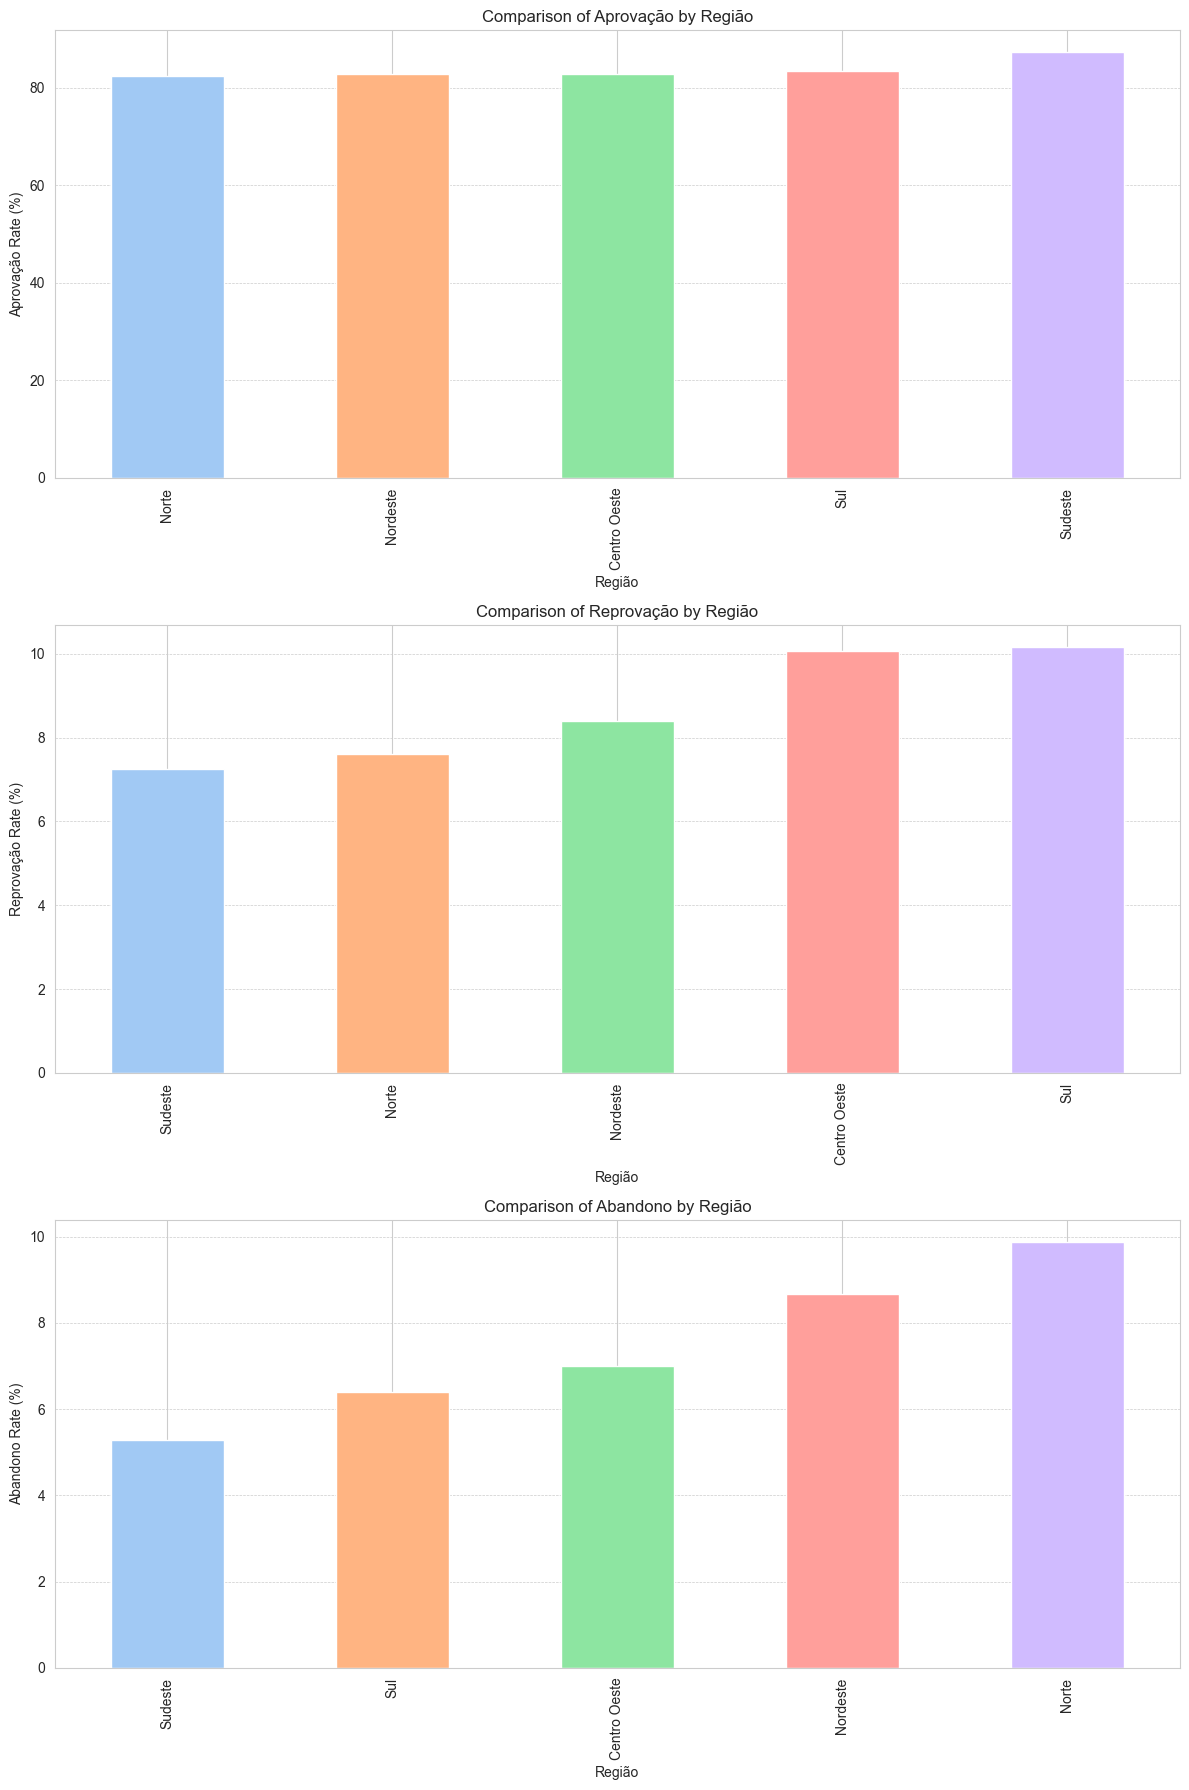

In [20]:
# Group by 'Região' and calculate the mean for each feature
region_means = df.groupby('Região')[trend_features].mean()

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 18))

# Plotting bar plots for each feature
for idx, feature in enumerate(trend_features):
    ax = axes[idx]
    region_means[feature].sort_values().plot(kind='bar', ax=ax, color=sns.color_palette("pastel", len(region_means)))
    ax.set_title(f'Comparison of {feature} by Região')
    ax.set_ylabel(f'{feature} Rate (%)')
    ax.set_xlabel('Região')
    ax.grid(True, which='both', linestyle='--', linewidth=0.5, axis='y')

plt.tight_layout()
plt.show()


#### Corelation Analysis

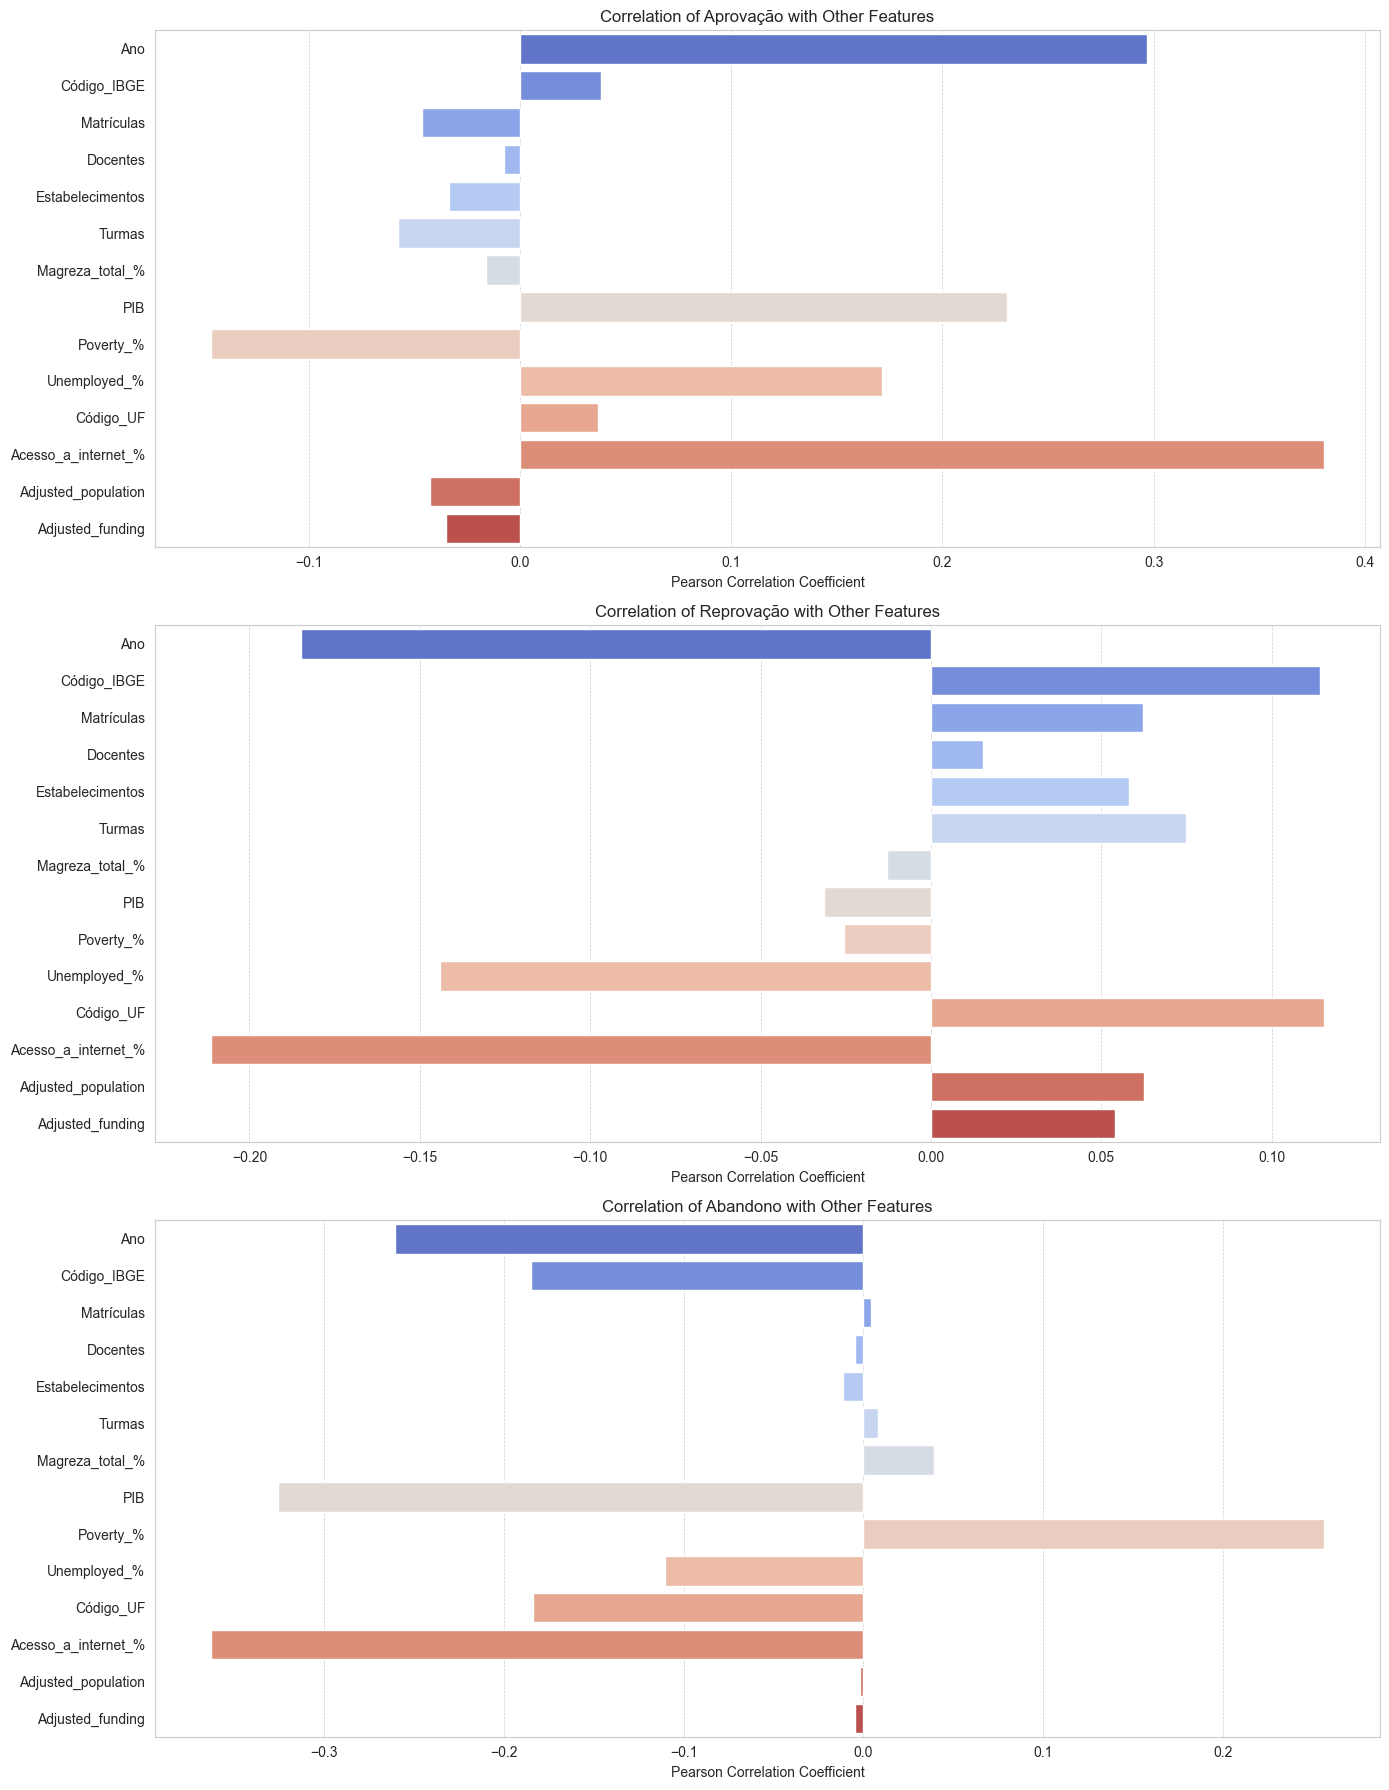

In [21]:
df_numeric = df.select_dtypes(include=['number'])

# Calculate the correlation of 'Aprovação' with other features
correlation_with_approval = df_numeric.corr()['Aprovação'].drop('Aprovação')

# Sort the correlations for better visualization
sorted_correlations = correlation_with_approval.sort_values(ascending=False)

# Calculate the correlation of 'Aprovação', 'Reprovação', and 'Abandono' with other features
correlation_approval = df_numeric.corr()['Aprovação'].drop(['Aprovação', 'Reprovação', 'Abandono'])
correlation_failure = df_numeric.corr()['Reprovação'].drop(['Aprovação', 'Reprovação', 'Abandono'])
correlation_dropout = df_numeric.corr()['Abandono'].drop(['Aprovação', 'Reprovação', 'Abandono'])

# Create a DataFrame to hold the correlations
correlations_df = pd.DataFrame({
    'Aprovação': correlation_approval,
    'Reprovação': correlation_failure,
    'Abandono': correlation_dropout
})

# Sort the DataFrame based on the absolute correlation with 'Aprovação' for better visualization
correlations_df = correlations_df.reindex(correlations_df['Aprovação'].abs().sort_values(ascending=False).index)

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(14, 18))

# Plotting the correlations for each feature

# Aprovação
sns.barplot(x=correlation_approval.values, y=correlation_approval.index, palette="coolwarm", ax=axes[0])
axes[0].set_title('Correlation of Aprovação with Other Features')
axes[0].set_xlabel('Pearson Correlation Coefficient')
axes[0].grid(True, which='both', linestyle='--', linewidth=0.5, axis='x')

# Reprovação
sns.barplot(x=correlation_failure.values, y=correlation_failure.index, palette="coolwarm", ax=axes[1])
axes[1].set_title('Correlation of Reprovação with Other Features')
axes[1].set_xlabel('Pearson Correlation Coefficient')
axes[1].grid(True, which='both', linestyle='--', linewidth=0.5, axis='x')

# Abandono
sns.barplot(x=correlation_dropout.values, y=correlation_dropout.index, palette="coolwarm", ax=axes[2])
axes[2].set_title('Correlation of Abandono with Other Features')
axes[2].set_xlabel('Pearson Correlation Coefficient')
axes[2].grid(True, which='both', linestyle='--', linewidth=0.5, axis='x')

plt.tight_layout()
plt.show()



#### Summary

- Socio-economic factors like GDP per capita, poverty rates, and unemployment rates play a significant role in influencing educational outcomes across municipalities.
- There are clear regional disparities in educational outcomes, with the Northern and Northeastern regions facing more challenges compared to others.
- Urban areas, generally show better educational outcomes than rural areas.

Aproval Rates:
- General Distribution & Box-Plot: The approval rates in most municipalities are high, with the median above 85%. There are some outliers at the lower end, indicating a few municipalities with unusually low approval rates.
- Trend Over Time: Approval rates have been increasing gradually over the years, showcasing a positive trend in educational outcomes.
- Comparison using Região: The Northern and Northeastern regions have lower approval rates compared to other regions, with the South having the highest.
- Comparison using Localização:  Urban areas have slightly lower approval rate compared to urban areas (counterintuitive).
- Correlation Analysis:
    - Positive correlation with features like GDP per capita (PIB) and internet access, suggesting regions with higher GDP or better internet access tend to have higher approval rates.
    - Negative correlation with features like Poverty_% and Unemployed_%, indicating that regions with higher poverty or unemployment rates tend to have lower approval rates.

Failure Rates:
- General Distribution & Box-Plot: The data is spread more evenly, with a median failure rate around 10%. Outliers are present on both the lower and higher ends.
- Trend Over Time: The failure rates have been decreasing over the years, indicating improvements in educational outcomes.
- Comparison using Região: The Northern region has the highest failure rate, followed by the Northeast. The South has the lowest.
- Urban areas have higher failure rate compared to rural areas (counterintuitive).
- Correlation Analysis:
    - Positive correlation with Poverty_% and Unemployed_%, suggesting regions with these challenges might also face higher failure rates.
    - Negative correlation with features like GDP per capita (PIB).

Dropout Rates:
- General Distribution & Box-Plot: Most municipalities have very low dropout rates, with the median close to 0%. However, there are outliers at the higher end.
- Trend Over Time: Dropout rates have been decreasing over the years, but the decline has been more subtle compared to failure rates.
- Comparison using Região: The Northern region has the highest dropout rate, whereas the South and Southeast have the lowest.
- Comparison using Localização: Urban areas generally have lower dropout rates than rural areas.
- Correlation Analysis:
    - Similar patterns as with Reprovação, but correlations are generally weaker.